In [22]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [23]:
df = pd.read_csv('../../data/users_behavior_complete.csv')
df.head(5)

,user_id,time_first_revert,time_first_contribution,time_last_contribution,days_until_revert,days_of_contribution,total_updates,updated_after_revert,updates_per_day,edits_before_revert
0,60,2009-11-10 19:21:18,2009-11-10 19:12:56,2009-11-10 20:15:43,0,0,14,1,0.000000,3.0
1,64,2010-07-28 20:46:23,2010-07-28 20:25:16,2010-08-08 23:30:29,0,0,33,1,0.000000,10.0
2,162,2007-12-19 03:32:13,2007-07-07 21:47:30,2010-07-17 22:59:00,164,164,119,1,0.725610,7.0
3,291,2006-11-27 18:30:30,2006-04-24 22:03:29,2010-05-10 05:55:15,216,216,875,1,4.050926,100.0
4,342,2005-12-27 02:27:17,2004-06-13 16:44:39,2010-08-18 03:07:32,561,561,4279,1,7.627451,149.0


In [24]:
df.edits_before_revert.fillna(0, inplace=True)

In [25]:
df.shape

(14829, 10)

In [26]:
df = df.dropna()
df.shape

(14829, 10)

In [27]:
df.updated_after_revert.value_counts()

1    14073
0      756
Name: updated_after_revert, dtype: int64

In [28]:
class0 = df[df.updated_after_revert==0]
class1 = df[df.updated_after_revert==1].sample(756)

df1 = shuffle(pd.concat([class0, class1]))
df1.shape

(1512, 10)

In [29]:
y = df1.updated_after_revert
X = df1[['days_until_revert', 'updates_per_day', 'edits_before_revert']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5],
    'class_weight': ['balanced', None]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lepo

/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/svm/base.

In [32]:
y_pred = best_clf.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.735973597359736

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       162
           1       0.78      0.60      0.68       141

   micro avg       0.74      0.74      0.74       303
   macro avg       0.75      0.73      0.73       303
weighted avg       0.74      0.74      0.73       303



Confusion matrix, without normalization
[[138  24]
 [ 56  85]]


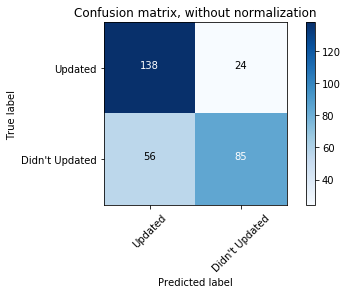

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Updated', "Didn't Updated"],
                      title='Confusion matrix, without normalization')